In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Load Daily total female births in California, 1959
-Time series dataset\
***Attribute info***:-\
1.Date = dd/mm/yyyy\
2.no. of female child births in integers

In [68]:
df=pd.read_csv('/content/Daily_total_female_births_in_California.csv')

In [69]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [70]:
#dataset shpe
df.shape

(365, 2)

In [71]:
#check null values
df.isnull().sum()

,0
Date,0
Births,0


In [72]:
#check duplicated rows
df.duplicated().sum()

0

#Features extraction/Selection

In [73]:
# Transforming Date column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [74]:
#extract birth year from Date
df['Year']=df['Date'].dt.year
#extract month from Date
df['Month']=df['Date'].dt.month
#extract quarter from Date
df['Quarter']=df['Date'].dt.quarter
#extract month name
df['Month_name']=df['Date'].dt.month_name()
#extract day from Date
df['Day']=df['Date'].dt.day
#extract day from Date
df['Day_week']=df['Date'].dt.dayofweek

In [75]:
df.head()

,Date,Births,Year,Month,Quarter,Month_name,Day,Day_week
0,1959-01-01,35,1959,1,1,January,1,3
1,1959-01-02,32,1959,1,1,January,2,4
2,1959-01-03,30,1959,1,1,January,3,5
3,1959-01-04,31,1959,1,1,January,4,6
4,1959-01-05,44,1959,1,1,January,5,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        365 non-null    datetime64[ns]
 1   Births      365 non-null    int64         
 2   Year        365 non-null    int32         
 3   Month       365 non-null    int32         
 4   Quarter     365 non-null    int32         
 5   Month_name  365 non-null    object        
 6   Day         365 non-null    int32         
 7   Day_week    365 non-null    int32         
dtypes: datetime64[ns](1), int32(5), int64(1), object(1)
memory usage: 15.8+ KB


In [77]:
df['Year'].unique()      #it has only one year so does not need

array([1959], dtype=int32)

In [78]:
#drop the colun contain 1- uniwque values
df.drop(['Year'],axis=1,inplace=True)

In [79]:
#check the data description
df.describe()

,Date,Births,Month,Quarter,Day,Day_week
count,365,365.000000,365.000000,365.000000,365.000000,365.0
mean,1959-07-02 00:00:00,41.980822,6.526027,2.509589,15.720548,3.0
min,1959-01-01 00:00:00,23.000000,1.000000,1.000000,1.000000,0.0
25%,1959-04-02 00:00:00,37.000000,4.000000,2.000000,8.000000,1.0
50%,1959-07-02 00:00:00,42.000000,7.000000,3.000000,16.000000,3.0
75%,1959-10-01 00:00:00,46.000000,10.000000,4.000000,23.000000,5.0
max,1959-12-31 00:00:00,73.000000,12.000000,4.000000,31.000000,6.0
std,NaN,7.348257,3.452584,1.118300,8.808321,2.0


#EDA(Explotary Data Analysis):-

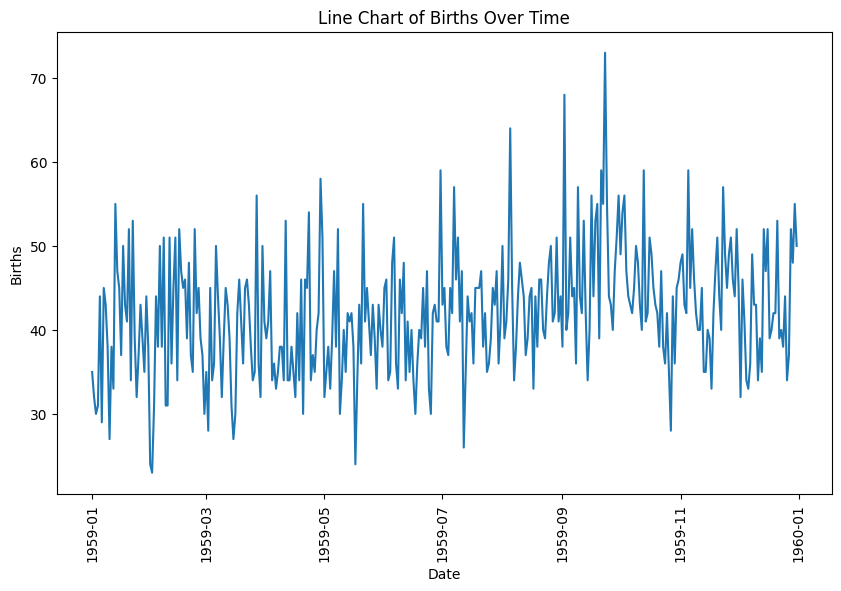

In [80]:
#'Date' and 'Births' columns line chart
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Births'])
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('Line Chart of Births Over Time')
plt.xticks(rotation=90)
plt.show()

***Average Births by Month chart***

In [81]:
avg_month_birth=df.groupby('Month_name')['Births'].mean()
avg_month_birth=avg_month_birth.sort_values(ascending=False)

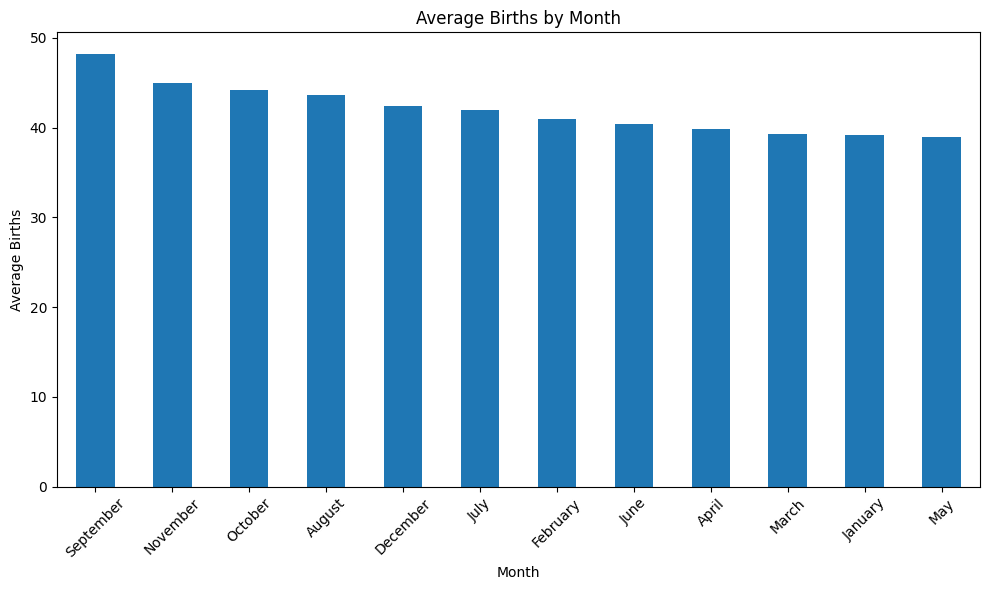

In [82]:
plt.figure(figsize=(10,6))
avg_month_birth.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Births')
plt.title('Average Births by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
day_of_week_births = df.groupby('Day_week')['Births'].mean()

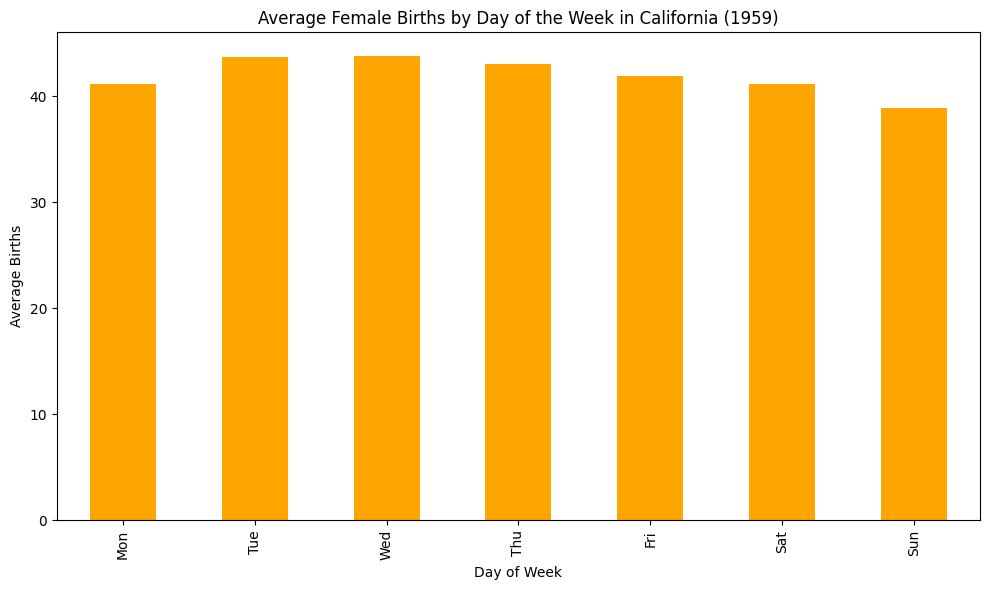

In [84]:
# Plotting average births by day of the week
plt.figure(figsize=(10, 6))
day_of_week_births.plot(kind='bar', color='orange')
plt.title('Average Female Births by Day of the Week in California (1959)')
plt.xlabel('Day of Week')
plt.ylabel('Average Births')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

#seasonal trends using statsmodel

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

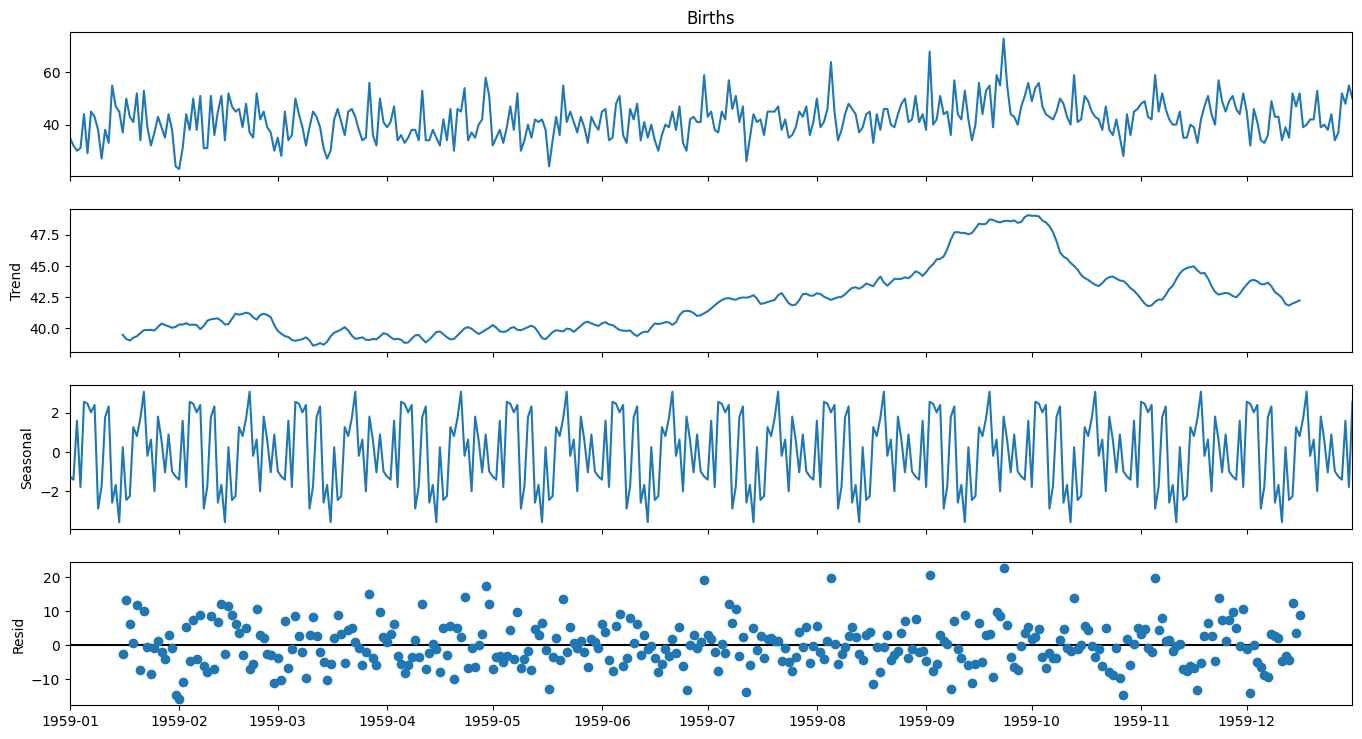

In [87]:
# Decomposing the time series
df.set_index('Date', inplace=True)
decomposition = sm.tsa.seasonal_decompose(df['Births'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

In [90]:
df['Births'].describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


***Bith rate Quater wise***

In [93]:
quater_birth=df.groupby('Quarter')['Births'].sum()
quater_birth

,Births
Quarter,
1,3579
2,3615
3,4097
4,4032


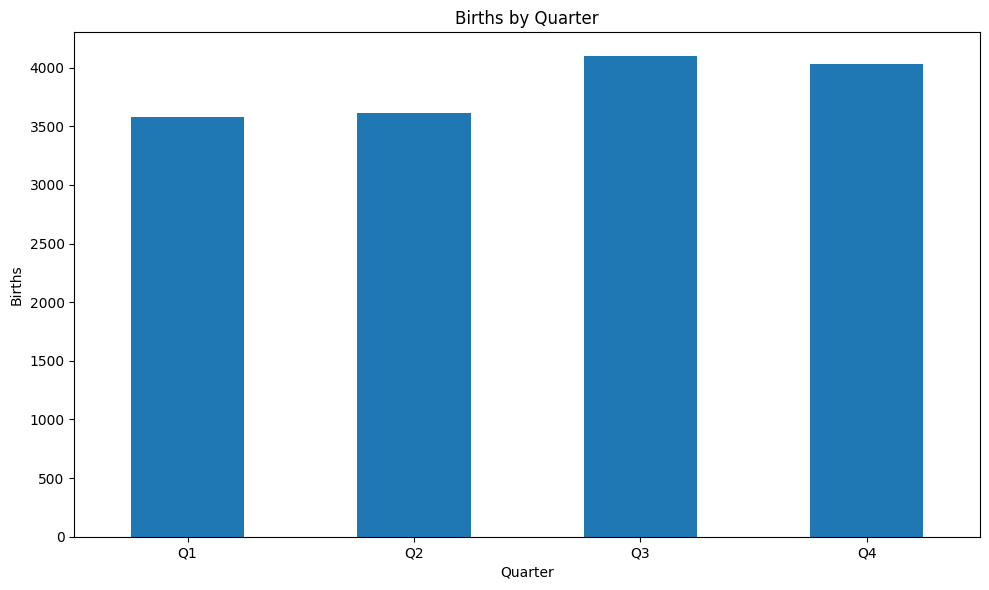

In [98]:
plt.figure(figsize=(10,6))
quater_birth.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Births')
plt.title('Births by Quarter')
plt.xticks(range(4),['Q1','Q2','Q3','Q4'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [86]:
df.columns

Index(['Date', 'Births', 'Month', 'Quarter', 'Month_name', 'Day', 'Day_week'], dtype='object')

* The additional columns extracted from the Date column (like Month, Quarter, Month_name, Day, and Day_week) typically do not directly help in time series models like ARIMA. These models are based on sequential data and rely on the order and lag of observations, rather than categorical features like month or day.*

In [106]:
df2=df.drop(['Month', 'Quarter', 'Month_name', 'Day', 'Day_week'],axis=1)

In [100]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

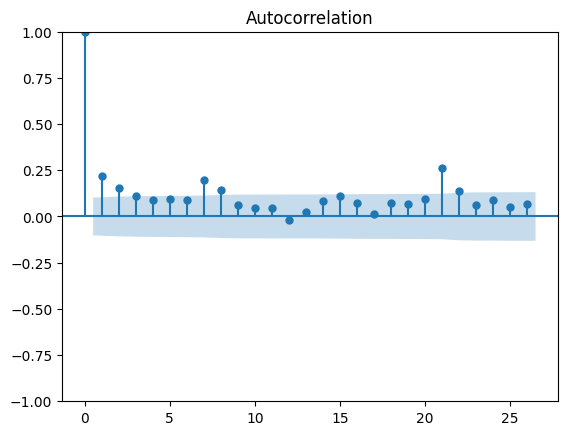

In [108]:
# plot_acf is to identify the parameter Q.
# ARIMA(p,d,q)

plot_acf(df2)
plt.show()

#split dataset in 80% and 20% between the train and test


In [110]:
train_size=int(len(df2)*0.8)
train_size

292

In [111]:
train,test=df2[:train_size],df2[train_size:]

In [114]:
#shape of train and test
print(f"Shape of train dataset:-",train.shape)
print(f"Shape of test dataset:-",test.shape)

Shape of train dataset:- (292, 1)
Shape of test dataset:- (73, 1)


#apply Arima model

In [115]:
from statsmodels.tsa.arima.model import ARIMA

In [150]:
model=ARIMA(train,order=(2,1,3))
model_fit = model.fit()

In [151]:
# Make predictions on the test data
forecast = model_fit.forecast(steps=len(test))

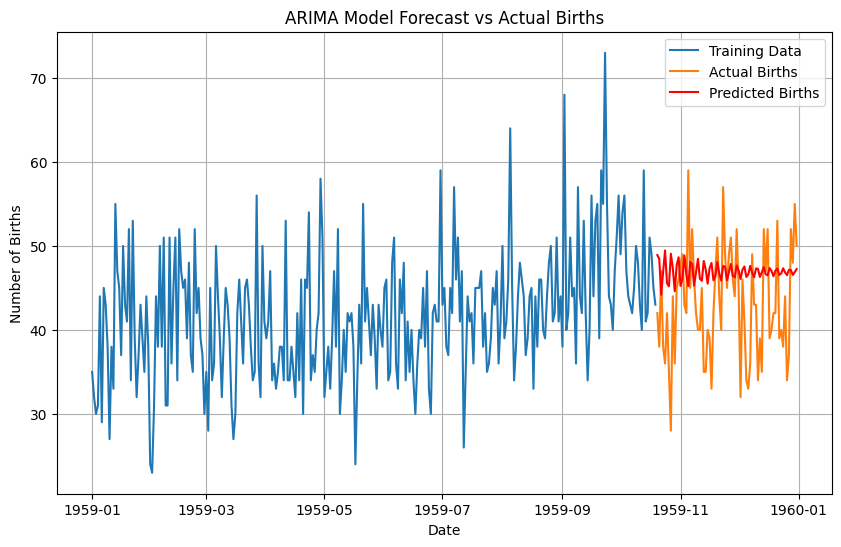

In [152]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Births'], label='Training Data')
plt.plot(test.index, test['Births'], label='Actual Births')
plt.plot(test.index, forecast, label='Predicted Births', color='red')
plt.title('ARIMA Model Forecast vs Actual Births')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

#apply ETS(Exponential Smoothing)

In [155]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [157]:
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

In [161]:
# Make predictions on the test data
forecast = model_fit.forecast(len(test))

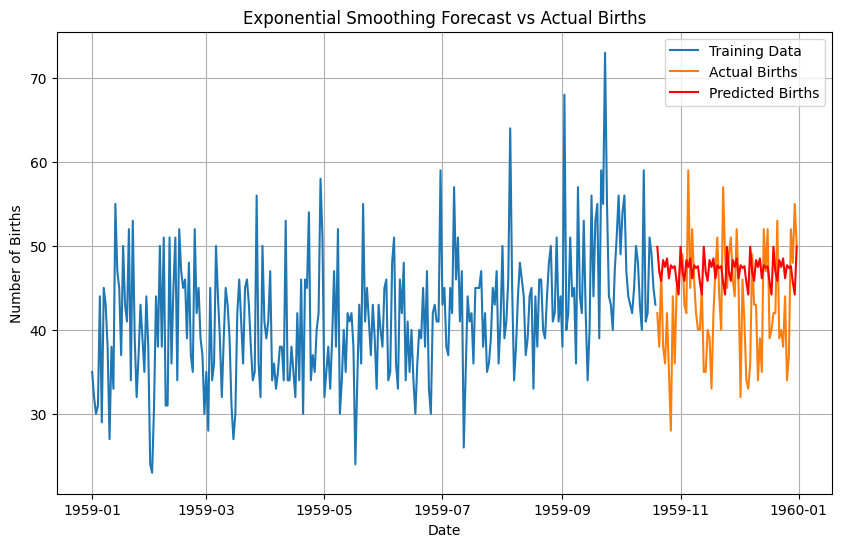

In [163]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Births')
plt.plot(test.index, forecast, label='Predicted Births', color='red')
plt.title('Exponential Smoothing Forecast vs Actual Births')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()


#save model

In [169]:
import joblib
# Save the model
joblib.dump(model_fit, 'ets_model.pkl')

print("ETS model saved successfully!")

ETS model saved successfully!
